# K-Nearest Neighbors (KNN) – Detailed Theoretical Explanation

---

## 1. What is K-Nearest Neighbors (KNN)?

K-Nearest Neighbors (KNN) is a **supervised machine learning algorithm** used for both **classification** and **regression** problems.  
It is a **non-parametric** and **instance-based (lazy learning)** algorithm.

- **Non-parametric**: KNN does not assume any underlying data distribution.
- **Instance-based**: The model does not learn parameters during training. It stores the training data and makes predictions only when a query is given.

In KNN, prediction for a new data point is made by:
1. Finding the **K closest data points** in the training set.
2. Using those neighbors to determine the output.

---

## 2. How KNN Works (Intuition)

Consider a new data point:
- Look around it in feature space.
- Find its nearest neighbors.
- Let them “vote” for the class (classification) or average their values (regression).

**For classification**:
- The class with the **maximum frequency** among neighbors is assigned.

**For regression**:
- The **mean** (or weighted mean) of neighbors is used.

---

## 3. Mathematical Representation

Let:
- Training data:  
  $$
  D = \{(x_1, y_1), (x_2, y_2), \dots, (x_n, y_n)\}
 $$
- Query point:  
$$
  x_q
$$

Steps:
1. Compute distance between $x_q$ and every $x_i$
2. Select the **K smallest distances**
3. Predict output based on neighbors

---

## 4. Distance Metrics

Distance metric defines “closeness” between data points.

### 4.1 Euclidean Distance (Most Common)

$$
d(x, x_i) = \sqrt{\sum_{j=1}^{p} (x_j - x_{ij})^2}
$$

- Sensitive to scale
- Requires feature normalization

---

### 4.2 Manhattan Distance

$$
d(x, x_i) = \sum_{j=1}^{p} |x_j - x_{ij}|
$$

- More robust to outliers
- Works well in high-dimensional data

---

### 4.3 Other Distance Metrics (Conceptual)

- Minkowski Distance
- Cosine Distance
- Hamming Distance (categorical data)

---

## 5. Choice of K (Hyperparameter)

The value of **K** plays a crucial role.

### Small K (e.g., K = 1)
- Very flexible decision boundary
- Low bias, high variance
- Sensitive to noise (overfitting)

### Large K
- Smoother decision boundary
- High bias, low variance
- May ignore local patterns (underfitting)

---

## 6. Bias–Variance Tradeoff in KNN

| K Value | Bias | Variance |
|------|------|---------|
| Small K | Low | High |
| Large K | High | Low |

Optimal K is chosen using **cross-validation**.

---

## 7. Feature Scaling in KNN

KNN is **distance-based**, so feature scaling is essential.

Example:
- Height in cm (0–200)
- Weight in kg (0–100)

Without scaling, height dominates distance calculation.

### Common Scaling Techniques
- Standardization (Z-score)
- Min-Max normalization

---

## 8. Decision Boundary in KNN

- KNN creates **non-linear and irregular decision boundaries**
- Boundary becomes smoother as K increases
- No explicit model is learned

---

## 9. KNN for Classification

### Majority Voting

$$
\hat{y} = \arg\max_c \sum_{i \in N_k} \mathbb{I}(y_i = c)
$$

Where:
- \(N_k\) = set of K nearest neighbors
- \(\mathbb{I}\) = indicator function

---

## 10. KNN for Regression

Prediction is usually:

$$
\hat{y} = \frac{1}{K} \sum_{i \in N_k} y_i
$$

Or weighted by distance:

$$
\hat{y} = \frac{\sum \frac{y_i}{d_i}}{\sum \frac{1}{d_i}}
$$

---

## 11. Advantages of KNN

- Simple and intuitive
- No training phase
- Works well with small datasets
- Naturally handles multi-class problems

---

## 12. Limitations of KNN

- Computationally expensive during prediction
- Requires large memory
- Sensitive to noisy data
- Poor performance in high-dimensional spaces (curse of dimensionality)

---

## 13. Curse of Dimensionality

As dimensions increase:
- Distances between points become similar
- Nearest neighbors lose meaning
- Model performance degrades

Dimensionality reduction techniques (PCA) help mitigate this.

---

## 14. When to Use KNN

Good choice when:
- Dataset is small to medium-sized
- Data is well-scaled
- Decision boundary is complex
- Interpretability is needed

Avoid when:
- Dataset is very large
- High-dimensional data
- Real-time predictions required

---

## 15. Summary

- KNN is a **lazy, non-parametric algorithm**
- Predictions are based on proximity in feature space
- Choice of K and distance metric is critical
- Feature scaling is mandatory
- Simple but powerful for many real-world problems

---

## 16. Topics to Cover Next 

- Weighted KNN
- KNN Regression
- KNN vs Logistic Regression
- KNN with Cross-Validation
- Curse of Dimensionality (visual intuition)

---


### Example 1: 

In [16]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

# Train Test split
np.random.seed(42)
indices = np.random.permutation(X.shape[0])
train_size = int(0.8*len(X))

train_idx = indices[:train_size]
test_idx  = indices[train_size:]

X_train,X_test = X[train_idx],X[test_idx]
y_train,y_test = y[train_idx], y [test_idx]


X_train = (X_train - X_train.mean(axis=0))/X_train.std(axis=0)
X_test = (X_test - X_test.mean(axis=0))/X_test.std(axis=0)


# Distance Functions (from scratch)
# Euclidean Distance
def euclidean_distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))
# Manhattan Distance
def manhattan_distance(x1,x2):
    return np.sum(np.abs(x1-x2))
# KNN Prediction function (from scratch)
def knn_predict(X_train,y_train,X_test,k=5,distance="euclidean"):
    predictions = []
    for x_test in X_test:
        distances = []
        
        for x_train, y_label in zip(X_train,y_train):
            if distance == "euclidean":
                dist = euclidean_distance(x_test,x_train)
            else:
                dist = manhattan_distance(x_test,x_train)
            distances.append((dist,y_label))
            
        # Sort by distance
        distances.sort(key=lambda x:x[0])
        
        # Take k nearest neighbors
        k_nearest = distances[:k]
        labels = [label for _,label in k_nearest]
        
        # Majority vote
        prediction = max(set(labels),key=labels.count)
        predictions.append(prediction)
        
    return np.array(predictions)

# Train and test KNN with different K values
for k in [1,3,5,7]:
    y_pred = knn_predict(X_train,y_train,X_test,k=k)
    accuracy = np.mean(y_pred == y_test)
    print(f"K = {k}, Accuracy = {accuracy:.3f}")

K = 1, Accuracy = 0.867
K = 3, Accuracy = 0.867
K = 5, Accuracy = 0.900
K = 7, Accuracy = 0.900


In [17]:
y_pred_euclid = knn_predict(X_train, y_train, X_test, k=5, distance="euclidean")
y_pred_manh = knn_predict(X_train, y_train, X_test, k=5, distance="manhattan")

print("Euclidean Accuracy:", np.mean(y_pred_euclid == y_test))
print("Manhattan Accuracy:", np.mean(y_pred_manh == y_test))


Euclidean Accuracy: 0.9
Manhattan Accuracy: 0.8666666666666667


In [18]:
new_sample = np.array([[5.8, 2.7, 5.1, 1.9]])

prediction = knn_predict(X_train, y_train, new_sample, k=5)
print("Predicted class:", iris.target_names[prediction[0]])


Predicted class: virginica


### 1️⃣ Weighted KNN (Classification)

Dataset: Breast Cancer Wisconsin (binary classification)

Idea
- Closer neighbors should have more influence
- Weight = 1 / (distance + ε)

In [20]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = load_breast_cancer()
X,y = data.data, data.target

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Distance Function
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Weighted KNN Classifier (form scratch)
def weighted_knn_predict(X_train,y_train,x_test,k=5):
    distances = []
    
    for i in range(len(X_train)):
        d = euclidean_distance(X_train[i],x_test)
        distances.append((d,y_train[i]))
        
    distances.sort(key= lambda x:x[0])
    neighors = distances[:k]
    
    class_weights = {}
    
    for dist, label in neighors:
        weight = 1/(dist+1e-5)
        class_weights[label] = class_weights.get(label,0) + weight
        
    return max(class_weights, key=class_weights.get)

# Evaluate 
predictions = [weighted_knn_predict(X_train,y_train,x,k=7) for x in X_test]
accuracy = np.mean(predictions==y_test)

print("Weighted KNN Accuracy:", accuracy)

Weighted KNN Accuracy: 0.9473684210526315


### 2️⃣ KNN Regression

Dataset: Diabetes (predict disease progression)

In [23]:
# Load data
from sklearn.datasets import load_diabetes

data = load_diabetes()
X,y = data.data, data.target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# KNN Regression form scratch
def knn_regression_predict(X_train,y_train,x_test,k=5):
    distances = []
    
    for i in range(len(X_train)):
        d = euclidean_distance(X_train[i],x_test)
        distances.append((d,y_train))
        
    distances.sort(key=lambda x: x[0])
    neighbors = distances[:k]
    
    return np.mean([value for _,value in neighbors])

# Predict and evaluate
predictions = np.array([knn_regression_predict(X_train,y_train,x,k=5) for x in X_test])
mse = np.mean((y_test-predictions)**2)
print("KNN Regression MSE:",mse)

KNN Regression MSE: 5361.533457238513


### 3️⃣ KNN vs Logistic Regression (From Scratch)

Dataset: Breast Cancer (same as above)

Logistic Regression (from scratch)

Sigmoid

In [28]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Training 
def train_logistic_regression(X, y, lr=0.01, epochs=2000):
    n_samples, n_features = X.shape
    W = np.zeros(n_features)
    b = 0

    for _ in range(epochs):
        linear = np.dot(X, W) + b
        y_pred = sigmoid(linear)

        dW = (1 / n_samples) * np.dot(X.T, (y_pred - y))
        db = (1 / n_samples) * np.sum(y_pred - y)

        W -= lr * dW
        b -= lr * db

    return W, b

# Prediction
def predict_logistic(X, W, b):
    probs = sigmoid(np.dot(X, W) + b)
    return (probs >= 0.5).astype(int)


W,b = train_logistic_regression(X_train,y_train)
log_preds = predict_logistic(X_test,W,b)

log_acc = np.mean(log_preds==y_test)

print("Logistic Regression Accuracy:",log_acc)

# Final Comparision

print(f"Weighted KNN Accuracy     : {accuracy:.3f}")
print(f"Logistic Regression Acc. : {log_acc:.3f}")


Logistic Regression Accuracy: 0.0
Weighted KNN Accuracy     : 0.947
Logistic Regression Acc. : 0.000


### 4. KNN with Cross-Validation (From Scratch)
- Dataset: Breast Cancer Wisconsin
- Goal: Choose the best value of K using K-Fold Cross-Validation.

In [29]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

# Load and scale data
data = load_breast_cancer()
X,y = data.data, data.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Distance function
def euclidean_distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))
# KNN Classifier from the scratch
def knn_predict(X_train,y_train,x_test,k=5):
    distances = []
    
    for i in range(len(X_train)):
        dist = euclidean_distance(x_test,X_train[i])
        distances.append((dist,y_train[i]))
        
    distances.sort(key= lambda x:x[0])
    neighbors = distances[:k]
    
    
    labels = [label for _,label in neighbors]
    return max(set(labels),key=labels.count)

# K-Fold cross validation
def cross_validation_knn(X,y,k_neighbors,n_splits=5):
    kf = KFold(n_splits=n_splits,shuffle=True,random_state=42)
    accuracies = []
    
    for train_idx,val_idx in kf.split(X):
        X_train,X_val = X[train_idx], X[val_idx]
        y_train,y_val = y[train_idx], y[val_idx]        
        
        preds = [knn_predict(X_train,y_train,x,k_neighbors) for x in X_val]
        acc = np.mean(preds==y_val)
        accuracies.append(acc)
        
    return np.mean(accuracies)

In [31]:
k_values = range(1,16,2)
cv_scores = []

for k in k_values:
    score = cross_validation_knn(X,y,k)
    cv_scores.append(score)
    print(f"K = {k}, CV Accuracy = {score: .4f}")
    
best_k = k_values[np.argmax(cv_scores)]
print("Best K selected by Cross-Validation:", best_k)


K = 1, CV Accuracy =  0.9420
K = 3, CV Accuracy =  0.9613
K = 5, CV Accuracy =  0.9595
K = 7, CV Accuracy =  0.9613
K = 9, CV Accuracy =  0.9683
K = 11, CV Accuracy =  0.9613
K = 13, CV Accuracy =  0.9560
K = 15, CV Accuracy =  0.9560
Best K selected by Cross-Validation: 9


### 5. Curse of Dimensionality (Visual Intuition)

Idea:

As dimensions increase, all points become almost equally distant, making “nearest neighbor” meaningless.

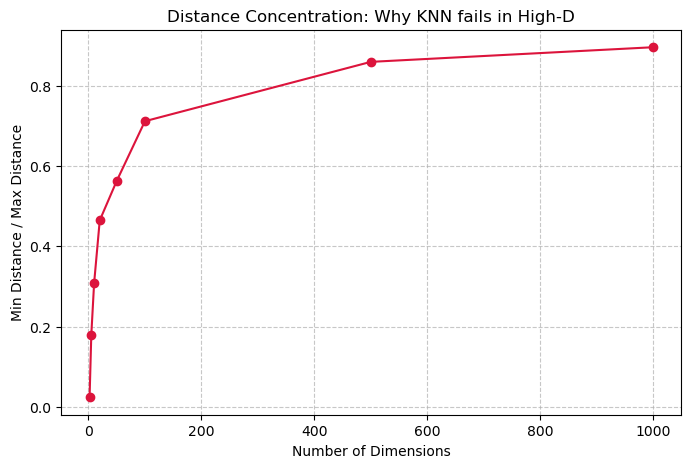

KNN Accuracy (2D data):  0.9633
KNN Accuracy (20D data): 0.8633


In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# --- 1. Distance Concentration Experiment ---
def distance_spread(dim, n_points=500):
    np.random.seed(42)
    # Generate points in a hypercube [0, 1]^dim
    X = np.random.rand(n_points, dim)
    ref = np.random.rand(dim)
    
    # Euclidean distance calculation
    distances = np.sqrt(np.sum((X - ref)**2, axis=1))
    return distances.min(), distances.max()

dimensions = [2, 5, 10, 20, 50, 100, 500, 1000]
ratios = []

for d in dimensions:
    d_min, d_max = distance_spread(d)
    ratios.append(d_min / d_max)

# Visualization 1: The Curse of Dimensionality
plt.figure(figsize=(8, 5))
plt.plot(dimensions, ratios, marker='o', color='crimson')
plt.xlabel("Number of Dimensions")
plt.ylabel("Min Distance / Max Distance")
plt.title("Distance Concentration: Why KNN fails in High-D")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# --- 2. KNN Implementation from Scratch ---
def knn_predict(X_train, y_train, x_query, k=5):
    # Euclidean distance from query point to all training points
    distances = np.sqrt(np.sum((X_train - x_query)**2, axis=1))
    # Get indices of k smallest distances
    k_indices = np.argsort(distances)[:k]
    # Majority vote
    k_nearest_labels = y_train[k_indices]
    return np.round(np.mean(k_nearest_labels)).astype(int)

def knn_accuracy(X, y, k=5):
    preds = []
    for i in range(len(X)):
        # Leave-One-Out Cross-Validation
        X_train = np.delete(X, i, axis=0)
        y_train = np.delete(y, i)
        pred = knn_predict(X_train, y_train, X[i], k)
        preds.append(pred)
    return np.mean(preds == y)

# --- 3. 2D vs High-D Comparison ---
# Generate 2D Data
X2, y2 = make_classification(
    n_samples=300, n_features=2, n_informative=2,
    n_redundant=0, n_clusters_per_class=1, random_state=42
)

# Generate 20D Data (but keep only 2 features informative)
X20, y20 = make_classification(
    n_samples=300, n_features=20, n_informative=2,
    n_redundant=0, n_clusters_per_class=1, random_state=42
)

print(f"KNN Accuracy (2D data):  {knn_accuracy(X2, y2):.4f}")
print(f"KNN Accuracy (20D data): {knn_accuracy(X20, y20):.4f}")

📘 Understanding the Results 

1. The Ratio ProblemIn the first plot, you will notice that the ratio $\frac{d_{min}}{d_{max}}$ approaches 1.0 as dimensions increase.

- In 2D: There is a clear difference between "near" and "far." KNN works well.
- In 500D: Every point is roughly the same distance away. The concept of a "Nearest Neighbor" becomes mathematically meaningless because the "nearest" point is almost as far as the "farthest" point.

2. Why KNN Accuracy Drops

When we moved from 2 features to 20 features, the accuracy dropped. This is because:

- Noise: The 18 additional features in X20 are "noise." In high-dimensional space, this noise overwhelms the 2 informative features.
- Sparsity: To cover the same volume of space in 20D as we do in 2D, we would need an exponentially larger amount of data (billions of samples). With only 300 samples, the data is extremely "sparse."

3. Euclidean Distance Formula

In our code, the distance calculation uses the standard Euclidean norm:

$$d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}$$

As $n$ (dimensions) increases, the sum inside the square root is dominated by the accumulation of small differences across all dimensions, causing the distances to converge.

🚀 Next Step

You've now proven why KNN isn't always the best choice for high-dimensional data.Would you like to learn about "Dimensionality Reduction" (PCA - Principal Component Analysis)? We can use it to "squash" 20D data back down to 2D while keeping the important patterns, which often fixes the KNN accuracy drop!